In [2]:
# Upload heart.csv file manually from your computer
from google.colab import files
uploaded = files.upload()


Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test (1).csv


Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

Step 1: Load Dataset

In [4]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')  # Update path if needed
print("Initial shape:", df.shape)

Initial shape: (1025, 14)


Step 2: Data Cleaning

In [5]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Step 3: Encode Categorical Columns

In [6]:
df = pd.get_dummies(df, drop_first=True)

Step 4: Exploratory Data Analysis (Optional - Show Plots)

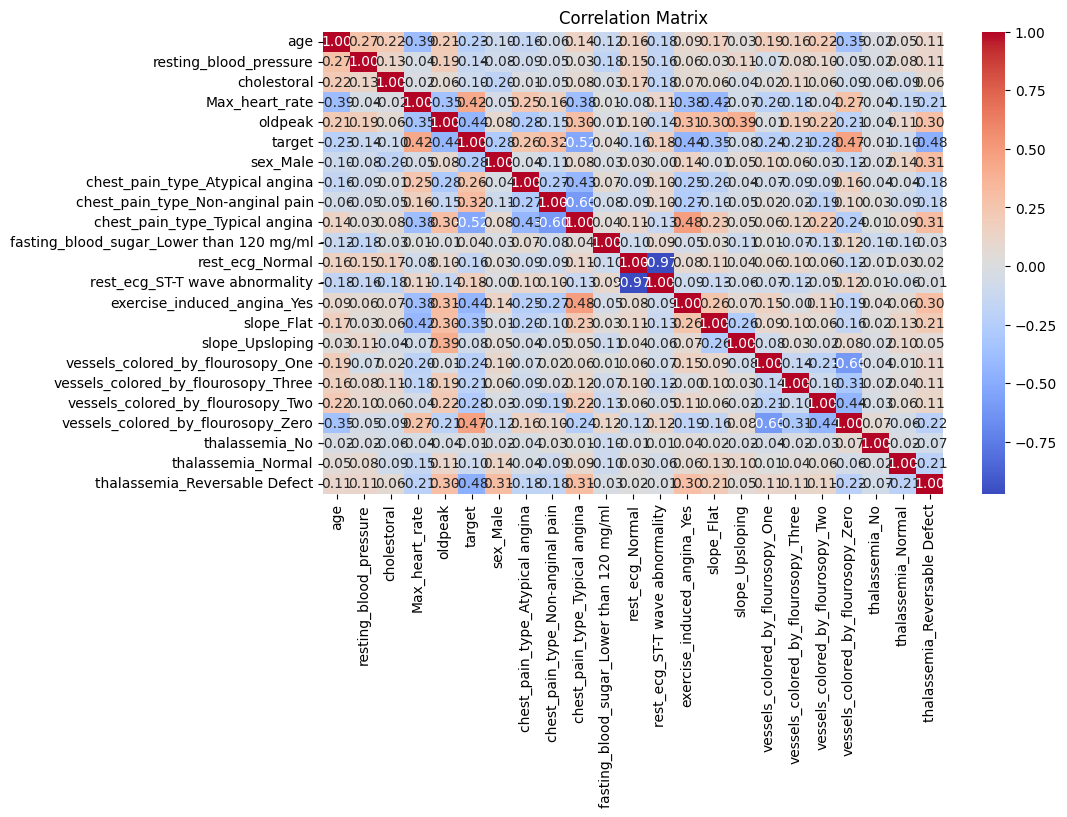

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Step 5: Split Data

In [8]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Step 6: Scale Data

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 7: Train Models


In [10]:

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


Step 8: Evaluate Models


=== Logistic Regression Evaluation ===
Accuracy: 0.7951219512195122
Confusion Matrix:
 [[76 26]
 [16 87]]
ROC AUC Score: 0.9020559680182753

=== Decision Tree Evaluation ===
Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
ROC AUC Score: 0.9854368932038835


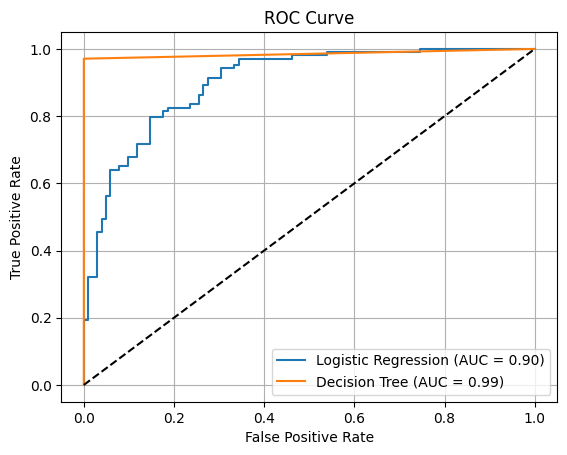

In [11]:

def evaluate_model(model_name, y_true, y_pred, y_prob):
    print(f"\n=== {model_name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_prob))

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_true, y_prob):.2f})')


# Logistic Regression Evaluation
evaluate_model("Logistic Regression", y_test, lr_pred, lr.predict_proba(X_test_scaled)[:, 1])

# Decision Tree Evaluation
evaluate_model("Decision Tree", y_test, dt_pred, dt.predict_proba(X_test)[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

Step 9: Feature Importance (from Decision Tree)

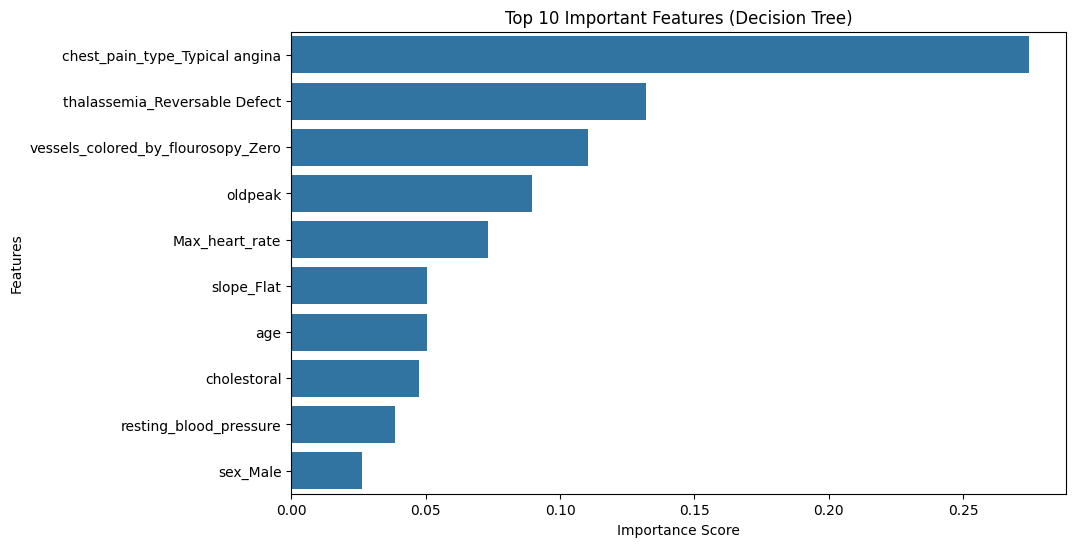

In [12]:
feature_importance = pd.Series(dt.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10])
plt.title("Top 10 Important Features (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
